In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore
import numpy as np # type: ignore
import seaborn as sns  # type: ignore

df = pd.read_csv('C:/Users/nejat/AIM Projects/data/togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
#Summary Statistics
summary_stats = df.describe()
summary_stats

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
# Check for missing values in GHI, DNI, and DHI
missing_values = df[['GHI', 'DNI', 'DHI']].isnull().sum()
print("Missing values in GHI, DNI, and DHI:\n", missing_values)

Missing values in GHI, DNI, and DHI:
 GHI    0
DNI    0
DHI    0
dtype: int64


In [4]:
# Check for negative values in GHI, DNI, DHI
print("Negative values in GHI, DNI, DHI:")
print(df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)])
df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]

Negative values in GHI, DNI, DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

     

In [5]:
# Check for outliers in GHI, DNI, DHI, ModA, ModB, WS, WSgust
z_scores_1 = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))
outliers_1 = df[(z_scores_1 > 3).any(axis=1)]

z_scores_2 = np.abs(stats.zscore(df[['ModA', 'ModB', 'WS', 'WSgust']]))
outliers_2 = df[(z_scores_2 > 3).any(axis=1)]

print("\nPotential outliers in GHI, DNI, and DHI:\n", outliers_1)
print("\nPotential outliers in ModA, ModB, WS, or WSgust:\n", outliers_2)


Potential outliers in GHI, DNI, and DHI:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
102985  2022-01-04 12:26  1070.0  487.1  678.6  1080.0  1059.0  28.6  23.6   
103022  2022-01-04 13:03  1053.0  482.2  681.0  1062.0  1042.0  29.6  22.4   
172085  2022-02-21 12:06   939.0  260.8  682.0   930.3   881.0  32.9   8.4   
172086  2022-02-21 12:07   925.0  248.4  678.4   913.3   865.0  32.8   8.5   
172091  2022-02-21 12:12   921.0  241.4  680.8   910.3   862.0  32.6   8.5   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
478781  2022-09-22 11:42   960.0  255.1  682.9   938.0   927.0  29.2  75.3   
478782  2022-09-22 11:43  1216.0  492.7  717.0  1192.0  1178.0  29.3  75.1   
478783  2022-09-22 11:44  1095.0  319.8  753.0  1062.0  1049.0  29.4  74.0   
478784  2022-09-22 11:45  1194.0  427.2  759.0  1174.0  1160.0  29.4  75.6   
478785  2022-09-22 11:46  1140.0  401.2  723.0  1107.0  1093.0  29.4  71.4   

         WS  WSgust 

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

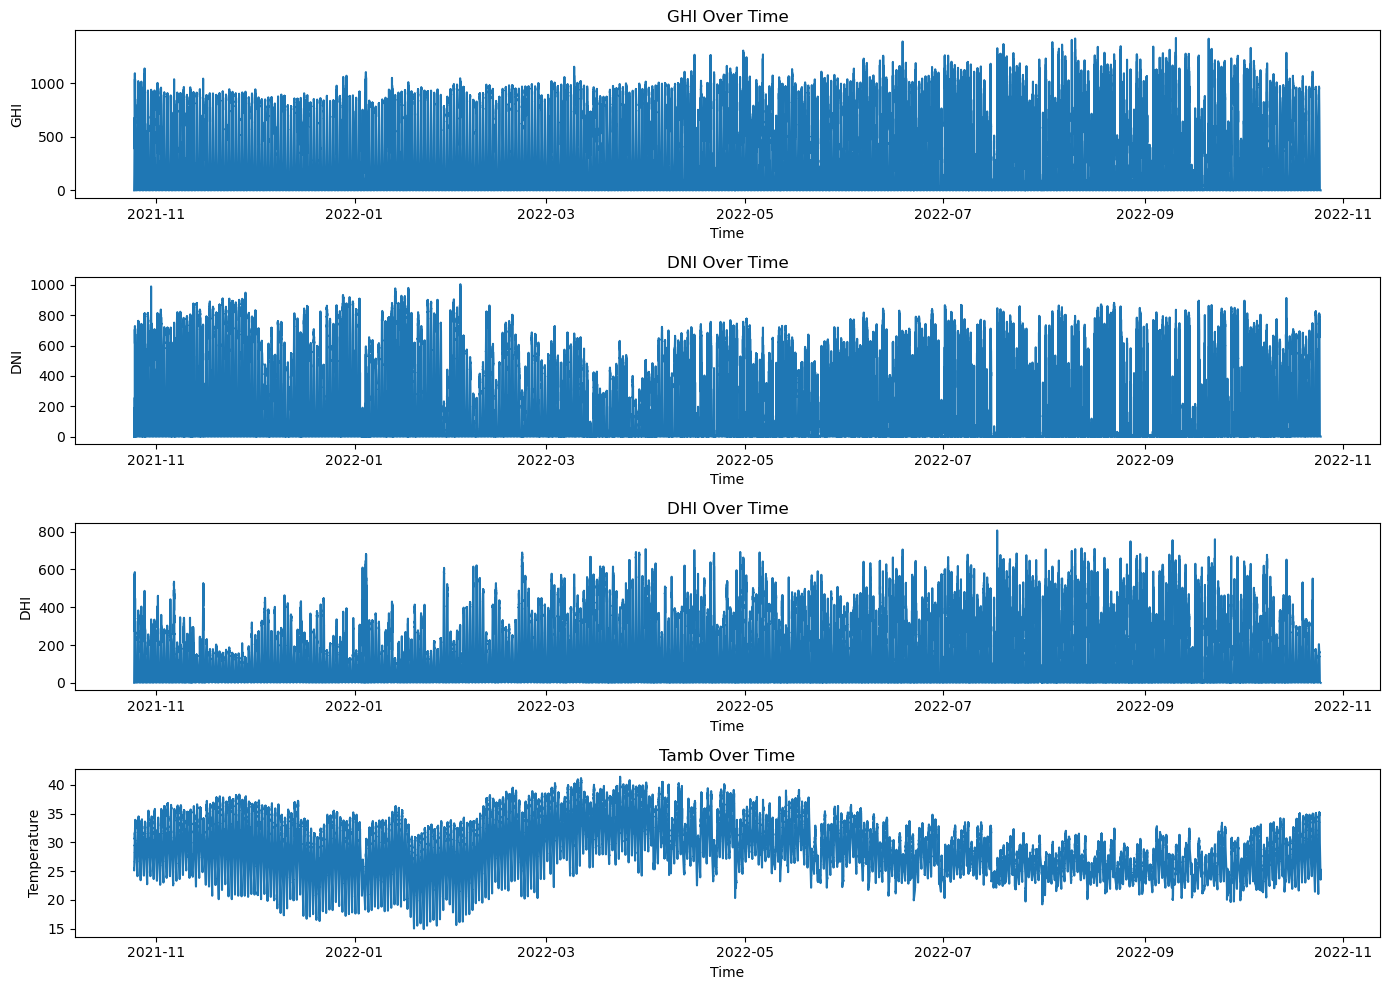

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.set_index('Timestamp', inplace=True)
df_clean = df[['GHI', 'DNI', 'DHI', 'Tamb']].dropna()

plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
sns.lineplot(data=df, x=df.index, y='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')

plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='DNI')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='DHI')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

plt.subplot(4, 1, 4)
sns.lineplot(data=df, x=df.index, y='Tamb')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nejat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

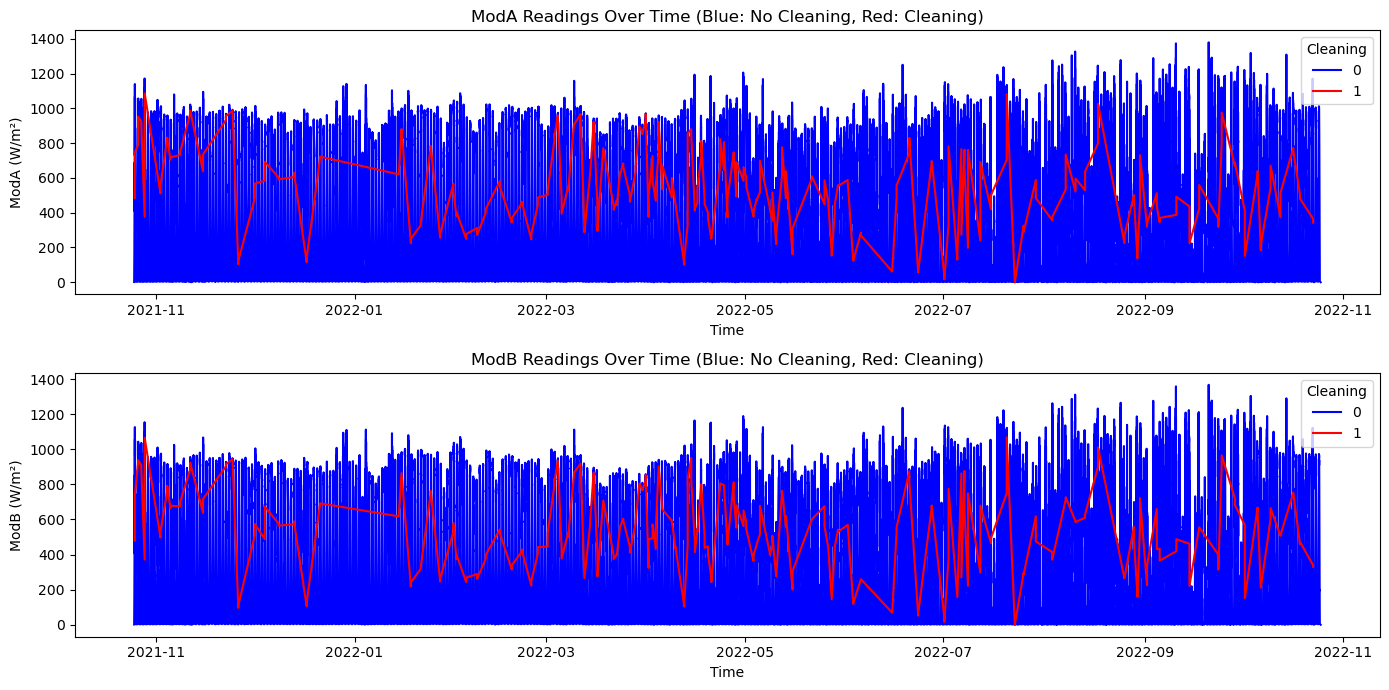

In [7]:
# Plot sensor readings ModA and ModB over time based on Cleaning status
plt.figure(figsize=(14, 7))

# ModA plot
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModA Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModA (W/m²)')

# ModB plot
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette={0: 'blue', 1: 'red'})
plt.title('ModB Readings Over Time (Blue: No Cleaning, Red: Cleaning)')
plt.xlabel('Time')
plt.ylabel('ModB (W/m²)')

plt.tight_layout()
plt.show()


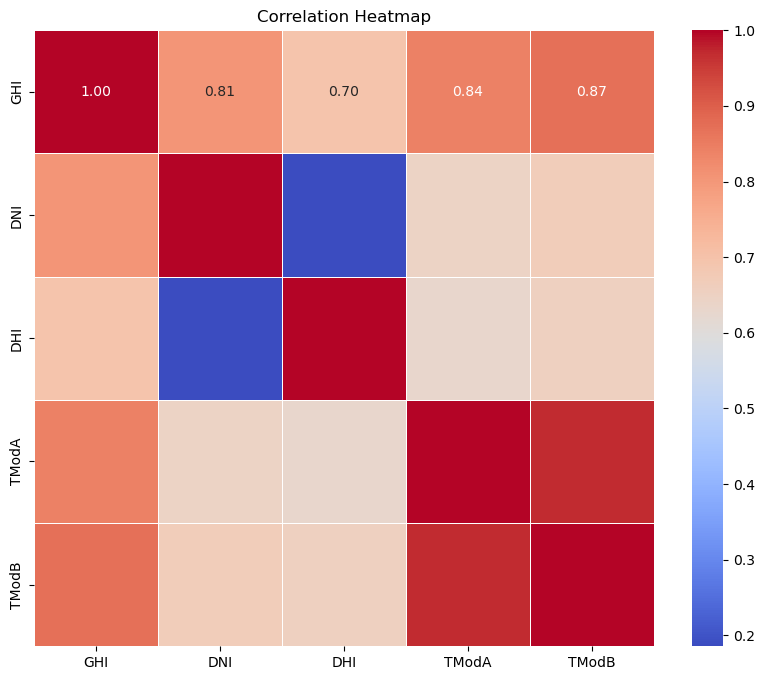

In [8]:
# Correlation matrix for solar radiation components and temperature measures
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


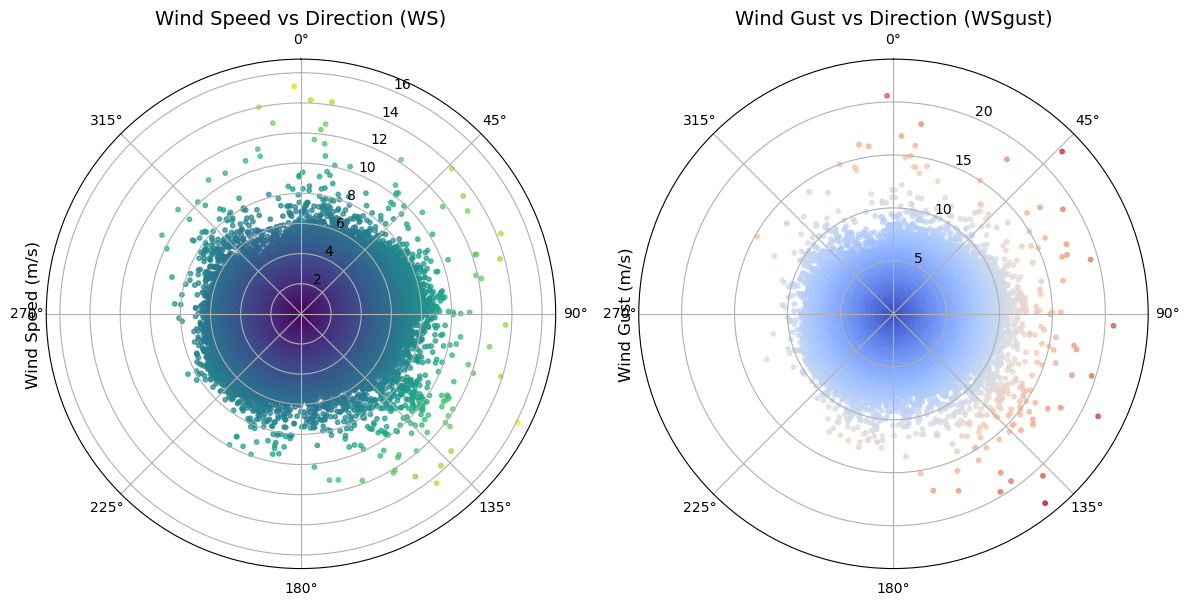

In [9]:
wind_data = df[['WS', 'WSgust', 'WD']].dropna()

wind_data['WD_radians'] = np.radians(wind_data['WD'])

plt.figure(figsize=(12, 6))
# Subplot 1: Wind Speed (WS) against Wind Direction (WD)
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.scatter(wind_data['WD_radians'], wind_data['WS'], alpha=0.7, s=10, c=wind_data['WS'], cmap='viridis')
ax1.set_theta_direction(-1)  # Set the direction of theta
ax1.set_theta_offset(np.pi / 2.0)  # Set the offset for proper orientation (North = 0 degrees)
ax1.set_title('Wind Speed vs Direction (WS)', fontsize=14)
ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)

# Subplot 2: Wind Gust Speed (WSgust) against Wind Direction (WD)
ax2 = plt.subplot(1, 2, 2, projection='polar')
ax2.scatter(wind_data['WD_radians'], wind_data['WSgust'], alpha=0.7, s=10, c=wind_data['WSgust'], cmap='coolwarm')
ax2.set_theta_direction(-1)
ax2.set_theta_offset(np.pi / 2.0)
ax2.set_title('Wind Gust vs Direction (WSgust)', fontsize=14)
ax2.set_ylabel('Wind Gust (m/s)', fontsize=12)

plt.tight_layout()
plt.show()

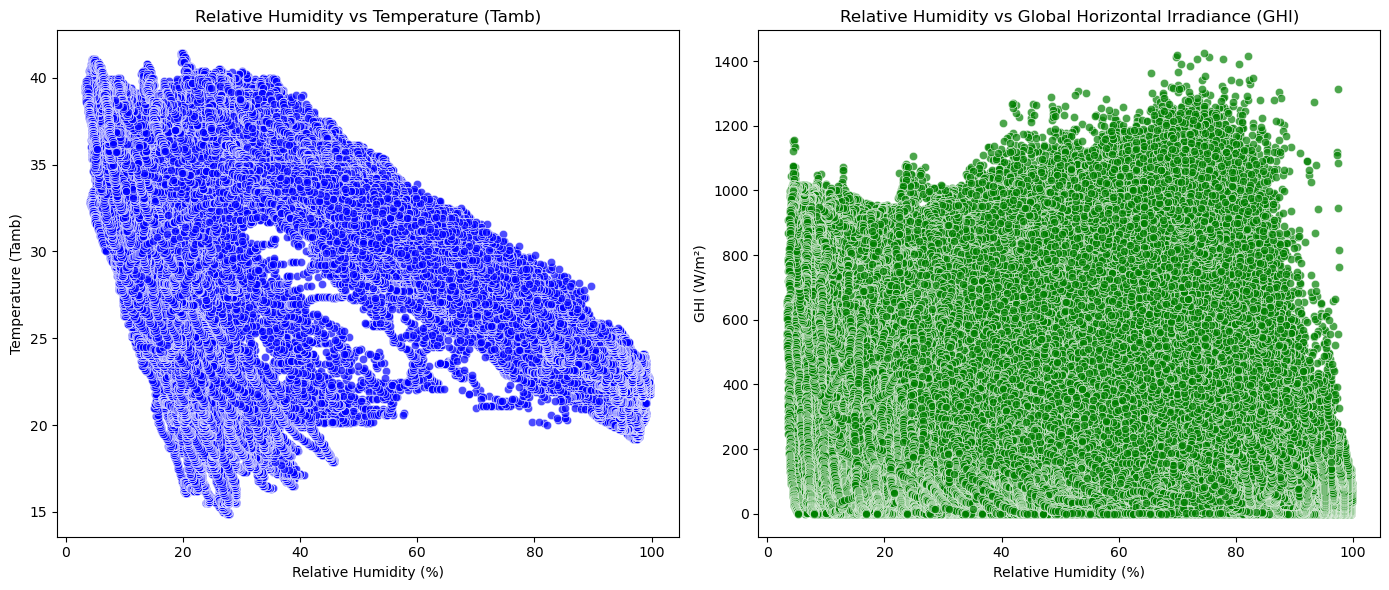

In [10]:
temp_data = df[['RH', 'Tamb', 'GHI']].dropna()

# Scatter plot: RH vs Temperature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=temp_data, x='RH', y='Tamb', alpha=0.7, color='blue')
plt.title('Relative Humidity vs Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (Tamb)')

# Scatter plot: RH vs Solar Radiation (GHI)
plt.subplot(1, 2, 2)
sns.scatterplot(data=temp_data, x='RH', y='GHI', alpha=0.7, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

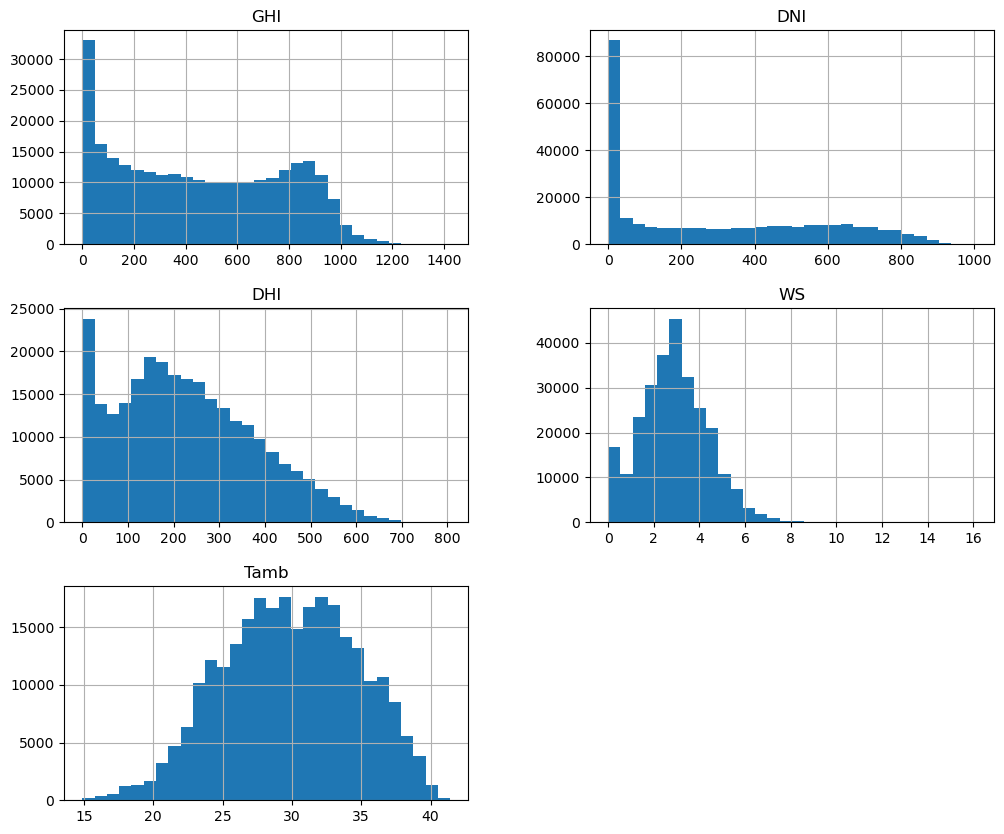

In [11]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins=30, figsize=(12, 10))
plt.show()

In [12]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))

outliers = (z_scores > 3).any(axis=1)
outliers_data = df[outliers]
print("Data points flagged as outliers based on Z-scores:\n", outliers_data)

Data points flagged as outliers based on Z-scores:
                        GHI    DNI    DHI   ModA   ModB  Tamb    RH    WS  \
Timestamp                                                                  
2021-11-05 16:10:00   50.5    0.0   49.1   51.7   48.7  33.3  41.8   8.2   
2021-11-05 16:56:00   29.6    0.0   32.4   30.4   28.9  32.4  43.3   8.5   
2021-11-05 16:57:00   28.6    0.0   31.3   29.3   27.8  32.3  44.5   7.8   
2021-11-09 16:03:00  142.5    9.1  145.4  132.6  123.8  33.2  45.3   8.4   
2021-11-09 16:09:00  179.3  113.9  146.8  175.7  163.4  31.1  50.9   8.0   
...                    ...    ...    ...    ...    ...   ...   ...   ...   
2022-10-13 15:24:00   25.3    0.0   27.1   22.0   22.0  24.5  80.4  10.0   
2022-10-13 15:25:00   23.4    0.0   25.0   20.3   20.2  24.2  81.3   8.6   
2022-10-13 15:26:00   22.3    0.0   23.9   19.4   19.3  24.0  82.6   7.5   
2022-10-13 15:27:00   21.8    0.0   23.6   19.2   19.1  24.0  83.0   9.6   
2022-10-13 15:28:00   21.8    0.0   

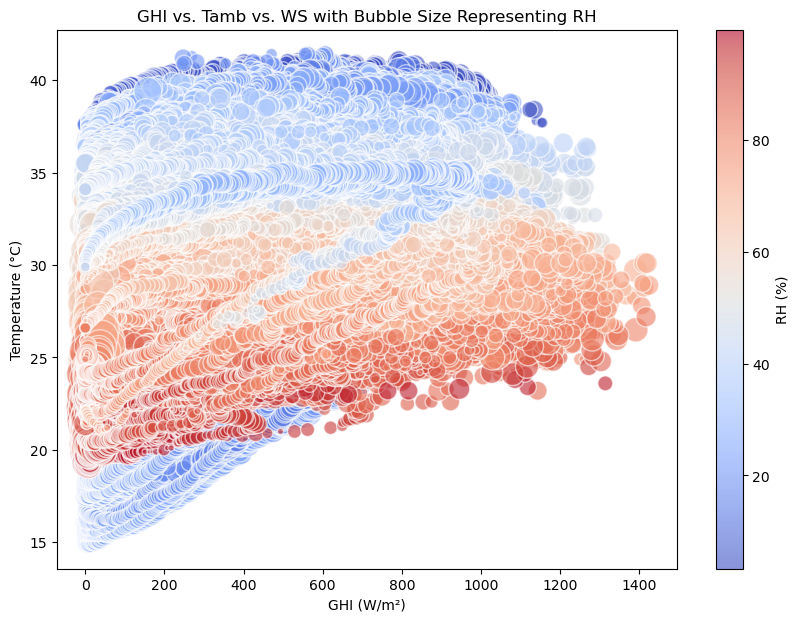

In [13]:
plt.figure(figsize=(10, 7))

bubble_size = df['WS'] * 50 
plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, c=df['RH'], cmap='coolwarm', alpha=0.6, edgecolor='w')

plt.title('GHI vs. Tamb vs. WS with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Temperature (°C)')
plt.colorbar(label='RH (%)')
plt.show()

In [15]:
# Create a copy of the original DataFrame
df_clean = df.copy()

# Drop columns that are completely null
df_clean = df_clean.dropna(axis=1, how='all')
dropped_columns = set(df.columns) - set(df_clean.columns)
print("Dropped columns (completely null):", dropped_columns)

# Fill missing values with mean
df_clean = df_clean.fillna(df_clean.mean())
missing_values_after_fill = df_clean.isnull().sum()
print("Remaining missing values after filling with mean:\n", missing_values_after_fill)


# Handle negative values by replacing them with NaN
df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = pd.NA
negative_ghi = df_clean['GHI'][df_clean['GHI'] < 0].count()
nan_in_ghi = df_clean['GHI'].isna().sum()
print(f"Negative GHI values after cleaning: {negative_ghi}")
print(f"NaN values in GHI after replacing negative values: {nan_in_ghi}")


Dropped columns (completely null): {'Comments'}
Remaining missing values after filling with mean:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64
Negative GHI values after cleaning: 0
NaN values in GHI after replacing negative values: 0
